# Tarea examen 1 - Física computacional
## Rizo Franco Samantha
### Hecho en Julia

In [1]:
#Importamos las paqueterias
using Plots #Biblioteca que utilizaremos para graficar.
using BenchmarkTools 
using Pkg #Biblioteca para descargar paquetes
using SymPy #La paquetería SymPy se ocupa para hacer operaciones simbólicas en la computadora.
using DataFrames
using DelimitedFiles

### 1 - En clase vimos como en un arreglo puede representar la gráfica de una función f(x) con los puntos ${x_i, f_i}$ con $i = 1, 2, 3, ..., N$. También vimos como obtener las primeras derivadas numéricas en cada punto, $f'(xi)$ y $f''(xi)$, es decir, podemos obtener el conjunto de puntos ${x_i, f'_i}$ y ${x_i, f''_i}$. Este problema consiste en hacer lo mismo pero para el caso de la integral, y para ello realice una función que tenga como entrada los puntos ${x_i, f_i}$ y que regrese ${x_i, F_i}$, donde $F_i$ representa la integral de la función hasta el $x_i-ésimo$ punto. Para corroborar que su función trabaja de manera adecuada, puede utilizar la función $cos(x)$ en el intervalo $[0, 2π]$. Puede utilizar cualquier algoritmo de integración que vimos en clase o en las tareas.

En las notas del curso viene este algoritmo que calcula la integral numérica pero utilizando en intervalo de validez completo para cada $x_i$ en el intervalo $[x_i−h,x_i+h]$. Este algoritmo únicamente utiliza los puntos pares o impares de la malla. De esta manera el algoritmo para los puntos de interés cuando se tiene un número impar de puntos es:
$$ \int^{ x_i+h}_{x_i−h}f(x)dx=\frac{f(x_{i−1})+4f(x_i)+f(x_{i+1})}{3}h$$
- Si *N es par* la suma tendrá que terminar en $N-1$ y listo debido a que "i" empieza en 1 y se avanza de 2 en 2. ***Nota: N es par pero tiene $N+1$ puntos ***
- Si *N es impar* la suma tendrá que empezar en $i=2$ y terminar en $N-1$ como en el caso anterior. ***Nota: N es impar pero tiene $N+1$ puntos ***
En el caso de que se tenga un número par de puntos hay que recorrer el índice de inicio y agregar el punto inicial como se indica en las notas del curso:
$$\int^{x_0+h}_{x_0}f(x)dx=\frac{h}{48}(23f_0+26f_1−4f_2+6f_3−3f_4)$$
Pero funciona a partir de 5 puntos porque para calcular el primer intervalo necesita los primeros 5 puntos, por lo que también tenemos que considerar los casos para los primeros 4 puntos.

Procedemos a programarlo:

In [56]:
function int_puntoApunto(x,f)
    A=zeros(length(f)) #Definimos un arreglo A de ceros
    A[1]=0 #Tenemos que la integral hasta el punto 1 es cero ya que no hay intervalo ahí
    h=x[2]-x[1] #Definimos el espacio entre dos puntos seguidos de la malla y como la malla es uniforme siempre es la misma h
    
    #Comenzamos considerando los casos para los primeros 4 puntos
    A[2]=f[2]*h #Calculamos la integral para 2 puntos por rectángulos como en la suma de Riemann
    A[3]=f[3]*h + A[2]  #Calculamos la integral para 3 puntos por rectángulos como en la suma de Riemann
    A[4]=f[4]*h + A[3]  #Calculamos la integral para 4 puntos por rectángulos como en la suma de Riemann
    
    #Utilizamos el algoritmo de de la tarea 2 visto en las notas para los demas puntos
    for i in range(5, stop=length(f))
        #Con la función módulo veremos si la cantidad de puntos en la malla es par o impar 
        if mod((i),2) == 1 #es impar
            for j in range(2,stop=i-1,step=2)
                A[i] += (h/3)*(f[j+1] + 4*f[j] + f[j-1])
            end
        end
        
        if mod((i),2) == 0 #es par
            k=0
            for j in range(3,stop=i-1,step=2)
                k += (f[j+1] + 4*f[j] + f[j-1])*(h/3)
                A[i]=k+(h/48)*(23*f[1] + 26*f[2] - 4*f[3] + 6*f[4] -3*f[4])
            end
        end
    end
    return A #Devuelve el arreglo A con los valores de las integrales 
end

int_puntoApunto (generic function with 1 method)

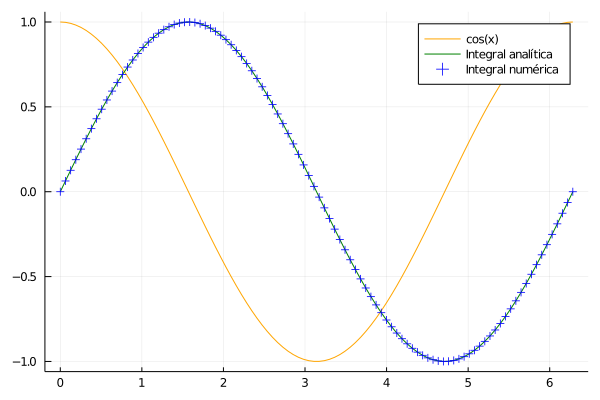

In [57]:
x = collect(range(0,stop=2*π,length=100)) #Definimos el rango de integración y el número de puntos en la malla
f = cos.(x) #Definimos la función a integral
f_int_analitica = sin.(x) #Definimos la intefral que ya conocemos analíticamente de f
f_int_numerica = int_puntoApunto(x,f)
plot(x,f,label="cos(x)", color="orange")
plot!(x,f_int_analitica,label="Integral analítica", color="green")
scatter!(x,f_int_numerica,label="Integral numérica",m=:cross, color="blue")

Se corroboró que la integral numérica calculada con nuestro algoritmo concuerdad perfectamente con la analítica para $cos(x)$ en [0,2$\pi$], por lo que nuestro algoritmo funciona perfectamente.

### 2 - En la página del curso, en la misma sección donde está este examen, hay un archivo que se llama ***t_acel.dat.*** Este es un archivo de texto que contiene datos de tiempos, $t_i$, y aceleración, $a_i$, acomodados dos columnas. Descargue el archivo en el mismo directorio donde está realizando su notebook.  Para leer los datos del archivo si utiliza Julia hay que hacer lo siguiente:

In [58]:
datos = readdlm("t_acel.dat",' ', Float64) #Descargamos los datos
ti=datos[:,1] #se guardan los valores que corresponden al tiempo
ai=datos[:,2] #se guardan los valores de la aceleración

1000-element Array{Float64,1}:
 2.557004888536586
 2.4726896287241553
 2.3967655287908327
 2.316568367219064
 2.208388779178159
 2.170885533601438
 2.185787729858506
 2.1721512378285266
 2.1632875444563537
 2.1431126895242816
 2.1216241420195048
 2.124025894380763
 2.110468668329383
 ⋮
 2.697464920995267
 2.610626361622819
 2.565176602107543
 2.518329208026623
 2.483976247873558
 2.4766004926107885
 2.4608118579038094
 2.4519912316319568
 2.4313233022368705
 2.4029003308501995
 2.357805123414571
 2.2796282591685864

### en donde ***datos[:,1]*** se guardarán los valores que corresponden al tiempo y en ***datos[:,2]*** se guardarán los valores de la aceleración. Haga las siguientes actividades:
#### (a) Haga la gráfica de los datos.

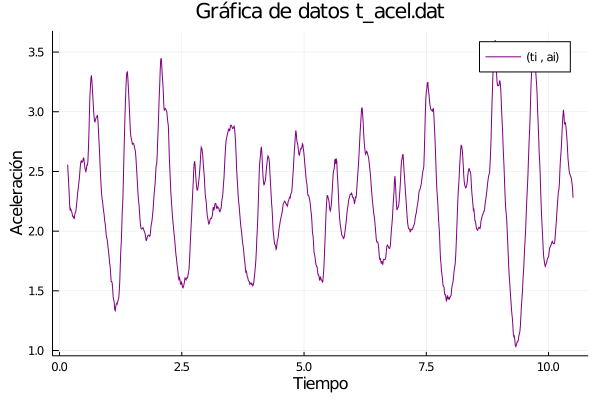

In [59]:
plot(ti, ai, xlabel = "Tiempo", ylabel = "Aceleración", title = "Gráfica de datos t_acel.dat", label = "(ti , ai)", color="purple")

#### (b) Calcule la derivada en cada punto utilizando algoritmos que desprecian términos en $h^3$ y $h^5$. Compare las gráficas de cada uno de los algoritmos y proporcione el error máximo entre los algoritmos utilizados.

Comenzamos checando si la malla es uniforme:

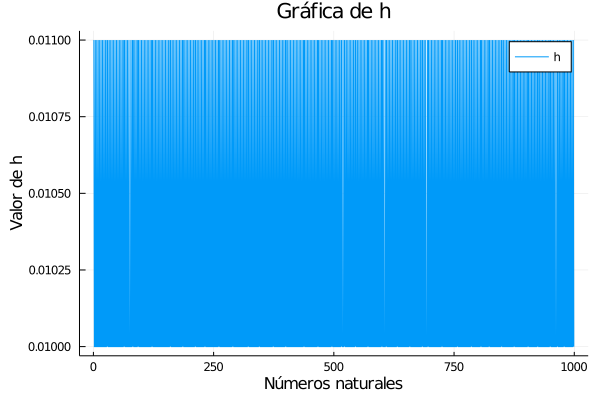

In [60]:
h=zeros(length(ti)-1)
for i in 1:length(ti)-1
    h[i]=ti[i+1]-ti[i]
end
plot(h, title="Gráfica de h", xlabel="Números naturales", ylabel="Valor de h", label="h")

Aunque no es completamente uniforme, podemos ver en la gráfica que es casi uniforme, así que para facilitar los calculos la consideraremos uniforme.

In [61]:
h=0.0110

0.011

En clase evimos que la derivada de f en el punto $x_0$ donde se desprecian los términos $h_3$ se ve de la siguiente forma:
$$f'(x_0)=\frac{f_{i+1}-f_{i-1}}{x_{i+1}-x_{i-1}}$$
En el caso de la frontera tenemos:
$$f'_i=\frac{1}{h}(-\frac{3}{2}f_i+2f_{i+1}-\frac{1}{2}f_{i+2})$$
A continuación se hace la programación de este algoritmo:

In [62]:
function deriv_h3(f,x)
    f_prima = zeros(length(f)) #Creamos un arreglo de ceros
    h = x[2] - x[1] #Definimos la h
    dosh = 2*h
    #Obtenemos la derivada en los puntos que no son frontera
    for i in 2:(length(f)-1)
        f_prima[i] = ( f[i+1]-f[i-1] )/(dosh)
    end
    # calcular el primer punto
    f_prima[1] = ( -0.5*f[3] + 2*f[2] -1.5*f[1] )/h
    # calcular el ultimo punto
    f_prima[end] = -( -0.5*f[end-2] + 2*f[end-1] -1.5*f[end] )/h    
    return f_prima
end

deriv_h3 (generic function with 1 method)

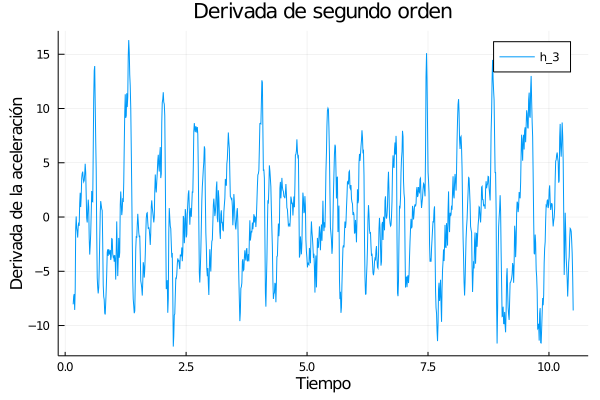

In [63]:
#Graficamos la derivada en cada tiempo, con f las aceleraciónes y en x los tiempos
x = datos[:,1]; y = deriv_h3(datos[:,2],datos[:,1]); #Definimos las x como los tiempos, definimos las y como la derivada de las aceleraciones respecto al tiempo
plot(x, y, xlabel = "Tiempo", ylabel = "Derivada de la aceleración", title = "Derivada de segundo orden", label="h_3")

En las notas de clase viene como derivar una expresión de la derivada de f(x) donde se desprecian términos de orden $h^5$ en adelante. Se toman dos puntos a la izquierda y dos a la derecha para una expresión simétrica. A continuación la expresión vista en clase: 
$$f′(xi)=\frac{1}{12h}(−f_{i+2}+8f_{i+1}−8f_i−1+f_{i−2})$$
En los puntos extremos se calculan de manera asimétrica con:
$$f′_i=\frac{1}{h}(−\frac{25}{12}f_i+4f_{i+1}−3f_{i+2}+\frac{4}{3}f_{i+3}−\frac{1}{4}f_{i+4})$$
A continuación se hace la programación de este algoritmo:

In [64]:
function deriv_h5(f,x)
    f_prima = zeros(length(f))
    h = x[2] - x[1]
    doceh = 12*h
    for i in 3:(length(f)-2)
        f_prima[i] = ( -f[i+2]+ 8*(f[i+1]-f[i-1]) +f[i-2] )/(doceh)
    end
    c0,c1,c2,c3,c4 = -25/12,4,-3,4/3,-0.25
    # calcular el primer punto
    f_prima[1] = ( c0*f[1] + c1*f[2] + c2*f[3] + c3*f[4] + c4*f[5] )/h
    # calcular el segundo punto
    f_prima[2] = ( c0*f[2] + c1*f[3] + c2*f[4] + c3*f[5] + c4*f[6] )/h
    # calcular el ultimo punto o el punto N
    f_prima[end] = -( c0*f[end] + c1*f[end-1] + c2*f[end-2] + c3*f[end-3] + c4*f[end-4] )/h
    # calcular el penultimo punto o el N-1
    f_prima[end-1] = -( c0*f[end-1] + c1*f[end-2] + c2*f[end-3] + c3*f[end-4] + c4*f[end-5] )/h
    return f_prima
end

deriv_h5 (generic function with 1 method)

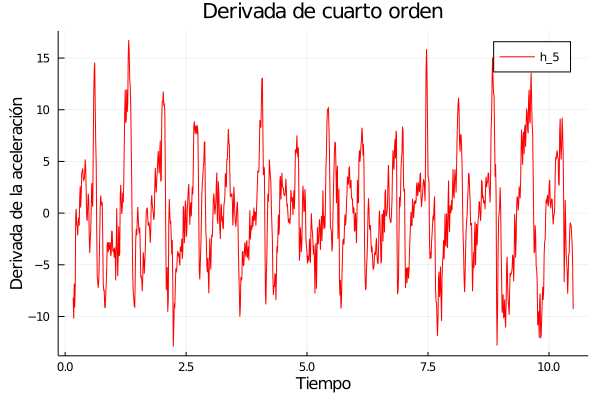

In [65]:
#Graficamos la derivada en cada tiempo, con f las aceleraciónes y en x los tiempos
x = datos[:,1]; y = deriv_h5(datos[:,2],datos[:,1]); #Definimos las x como los tiempos, definimos las y como la derivada de las aceleraciones respecto al tiempo
plot(x, y, xlabel = "Tiempo", ylabel = "Derivada de la aceleración", title = "Derivada de cuarto orden", label="h_5", color="red")

Procedemos a comparar las gráficas con cada algoritmo:

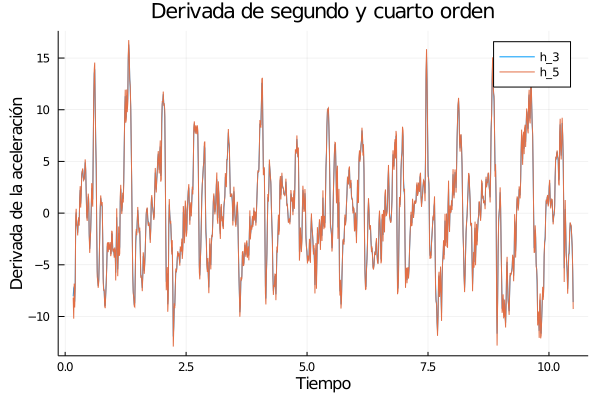

In [66]:
#Graficamos la derivada en cada tiempo, con amos algoritmos
x = datos[:,1]; y1 = deriv_h3(datos[:,2],datos[:,1]); y2 = deriv_h5(datos[:,2],datos[:,1]); #Definimos las x como los tiempos, definimos las y como la derivada de las aceleraciones respecto al tiempo
plot(x, y1, xlabel = "Tiempo", ylabel = "Derivada de la aceleración", title = "Derivada de segundo y cuarto orden", label = "h_3")
plot!(x, y2, label = "h_5")

A continuación calculamos el error máximo entre los algoritmos utilizados.

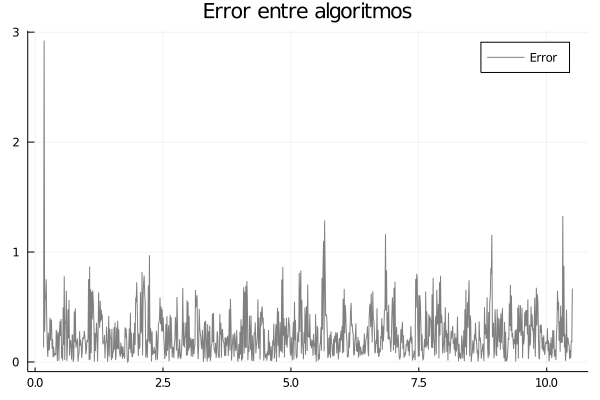

In [67]:
Error= abs.(y2 - y1) #El error es el valor absoluto de la diferencia y2 y y1 definidos en la gráfica de arriba
plot(ti, Error, title = "Error entre algoritmos", grid = true, color="gray", label="Error") #Graficamos el error

In [68]:
ErrorMax=maximum(abs.(y2 - y1)) #
println("El error maximo entre los algoritmos es ", ErrorMax)

El error maximo entre los algoritmos es 2.923913117495892


#### (c) Calcule la integral total de los datos con el algoritmo ***int_alg2*** que viene en el ***NB_6*** de la página del curso y compare el resultado utilizando el algoritmo de Boole. ¿Cuál es la diferencia numérica entre ambos algoritmos?
El algoritmo ***int_alg2*** que viene en el ***NB_6*** es el siguiente:

In [69]:
function int_alg2(x,y)
    integral = 0
    h = x[2] - x[1]
    if mod(length(y),2) == 0
        inicio = 3
    elseif mod(length(y),2) == 1
        inicio = 2        
    end
    for i in inicio:2:length(y)-1
        integral += y[i+1] + 4*y[i] + y[i-1]
    end
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(length(y),2) == 0
        integral += (h/48)*(23*y[1] + 26*y[2] - 4*y[3] + 6*y[4] -3*y[5])
    end
    return integral
end

int_alg2 (generic function with 1 method)

In [70]:
println("La integral con el algoritmo int_alg2 es: ", int_alg2(ti,ai)) #Imprimimos el valor de la integral con el algoritmo int_alg2 para los datos

La integral con el algoritmo int_alg2 es: 24.989833109037374


El algoritmo de Boole lo hicimos en la ***tarea 2*** y es el siguiente:

In [71]:
#Definimos la función integral del ejercicio3
function int_Boole(x,y) #x es la malla de puntos, y es función que se integrará
    integral = 0 #Se le asigna el valor incial 0 a la integral desde el cual se empieza a sumar el valor de la integral
    h = x[2] - x[1] #Definimos el espacio entre dos puntos seguidos de la malla.
 
    #Dividimos número de puntos de la malla sobre la que integraremos (N) entre 4       
    #Si el residuo es uno empieza desde 1
    if mod(length(y),4) == 1 
        inicio = 1
    end
    #Si el residuo es dos empieza desde 2
    if mod(length(y),4) == 2 
        inicio = 2
    end
    #Si el residuo es tres empieza desde 3
    if mod(length(y),4) == 3 
        inicio = 3
    end
    #Si el residuo es cero empieza desde 4
    if mod(length(y),4) == 0 
        inicio = 4
    end
    
    for i in inicio:4:length(y)-4 #Va de 4 en 4 y termina en N-4
        #Se define la función de la regla de Boole
        integral += 7*y[i] + 32*y[i+1] + 12*y[i+2] + 32*y[i+3] + 7*y[i+4]
    end
    integral = integral*(2*h/45)
     
    # punto inicial si el residuo es 1:     
    if mod(length(y),4) == 2 
        integral += (h/48)*(23*y[1] + 26*y[2] - 4*y[3] + 6*y[4] -3*y[5])
    end
    
    # punto inicial si el residuo es 2: 
    if mod(length(y),4) == 3 
        integral += (h/3)*(y[3] + 4*y[2] + y[1])
    end
    
    # punto inicial si el residuo es 3:
    if mod(length(y),4) == 0 
        integral += (3*h/8)*(y[1] + 3*y[2] + 3*y[3] + y[4])
    end
    return integral
end

int_Boole (generic function with 1 method)

In [72]:
println("La integral con el algoritmo int_alg2 es: ", int_Boole(ti,ai)) #Imprimimos el valor de la integral con el algoritmo int_Boole para los datos
println("La diferencia numérica entre ambos algoritmos es ", abs(int_Boole(ti,ai)-int_alg2(ti,ai))) #Imprimimos el valor absoluto de la resta entre los algoritmos

La integral con el algoritmo int_alg2 es: 24.99008983423345
La diferencia numérica entre ambos algoritmos es 0.0002567251960776673


#### (d) Calcule la integral de los datos, es decir, un conjunto de puntos ${t_i, v_i}$ tales que su derivada numérica sean los puntos ${t_i, a_i}$ proporcionados por el archivo.

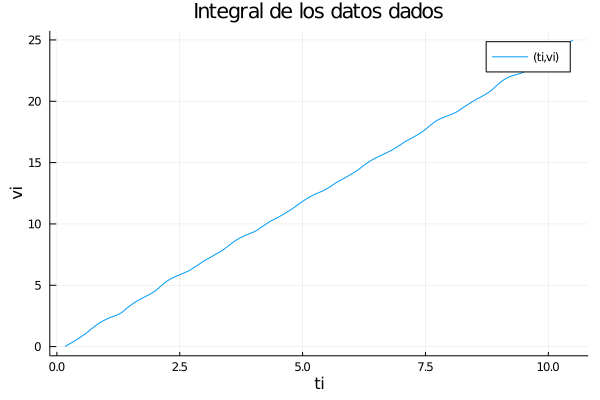

In [81]:
plot(ti,int_array(ti,ai),label="(ti,vi)", title="Integral de los datos dados", xlabel="ti",ylabel="vi") #Graficamos la integral de los puntos (ti,ai)

A continuación derivaremos los puntos ($t_i,v_i$) para comprobar que da los puntos ($t_i,a_i$)

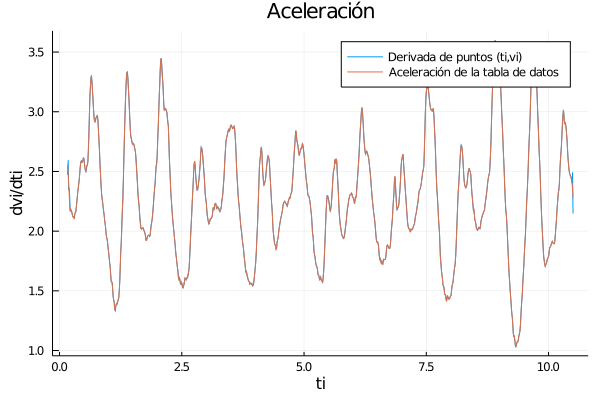

In [87]:
vi=int_array(ti,ai) #Integramos los puntos 
deriv=deriv_h5(vi,ti)
plot(ti, deriv, title="Aceleración", xlabel="ti", ylabel="dvi/dti", label="Derivada de puntos (ti,vi)")
plot!(ti,ai,label="Aceleración de la tabla de datos")

Claramente los puntos concuerdan aunque cno completamente así que graficamos el error:

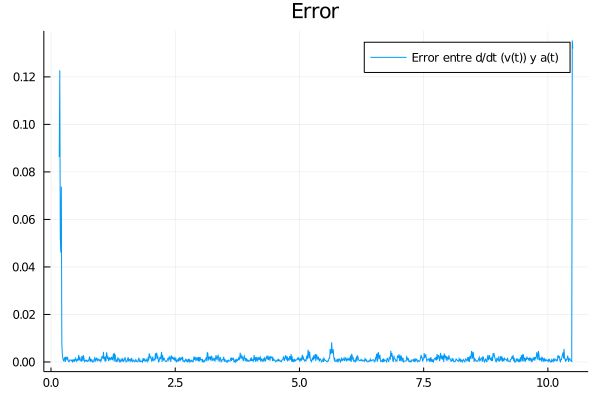

In [89]:
error=abs.(deriv_h5(vi,ti)-ai)
plot(ti,error,title = "Error", label="Error entre d/dt (v(t)) y a(t)", linewidth = 1, grid = true)

Podemos ver que el error es muy pequeño. Este error sale de que consideramos la malla uniforme y no lo era completamente.

### 3 - Sabemos que $\int^\infty_1\frac{dx}{x^2}=1$, sin embargo numéricamente no es factible utilizar el infinito. De esta manera genere una forma de calcular dicha integral hasta obtener una precisión de $10^{−3}$. Explique su procedimiento de tal manera que pueda garantizar el resultado de dicha integral y cual sería su generalización.

A continuación el algoritmo para calcular dicha integral hasta obtener una precisión de $10^{−3}$.

In [13]:
i=2 #Inicialmente la mmala comienza en 1 y termina en 2 
presicion=0.001 #Queremos que tenga una presición de 10^-3
x = collect(range(1,stop=i,length=1000)) #nuestra malla
while abs(1-integral(x,x.^(-2)))>=presicion #utilizamos un ciclo while que se repetirá hatsa que la presición sea mayor que 0.001
    i+=1
    x=collect(range(1,stop=i,length=1000))
    end #termina el ciclo while

x=collect(range(1, stop=i, length=1000)) #i ya es el obtenido con while
println("La integral vale:", integral(x,x.^(-2))) #imprimimos el valor de la integral
println("El error es:", abs(1-integral(x,x.^(-2))))#Imprimimos el error de la integral (ya sabiamos que vale 1)

La integral vale:0.9990416672345503
El error es:0.0009583327654496543
